In [112]:
# Import key python Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Load the data
file_path = '/content/BUS_PROFILE_TELECOM.csv'
data = pd.read_csv(file_path)

In [114]:
# Inspect the first few rows of the data
print(data.head())

                                          BUS_NAME           STREET_ADDR  \
0                                Travel Guide, LLC      851 Trafalgar CT   
1                                        Firstbank    2323 E Arapahoe Rd   
2                                      Big 5 Corp.          1610 Main St   
3       The Preserve At Bal Harbor Condo Assoc Inc  2001 Bal Harbor Blvd   
4  Diamond Shamrock Refining and Marketing Company    34 Centennial Blvd   

   STREET_ADDR_2             CITY STATE_CD COUNTRY_NAME  EMPLOYEES_HERE  \
0            NaN         Maitland       FL          USA              63   
1            NaN       Centennial       CO          USA               1   
2            NaN         Longmont       CO          USA              20   
3            NaN      Punta Gorda       FL          USA               4   
4            NaN  Highlands Ranch       CO          USA               7   

   EMPLOYEES_TOTAL  NO_OF_FMLY_MMBRS  YEAR_ESTABLISHED  ...  \
0               63           

In [115]:
# Select relevant columns for segmentation
spend_columns = [
    'EST_NETWORK_SPEND_2023',
    'EST_SECURITY_SPEND_2023',
    'EST_VOICE_SPEND_2023',
    'EST_SERVICES_SPEND_2023',
    'EST_TOT_SPEND_2023'
]

In [116]:
# Filter out rows with missing values in the selected columns
data = data.dropna(subset=spend_columns)

In [117]:
# Normalize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[spend_columns])

In [118]:
!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

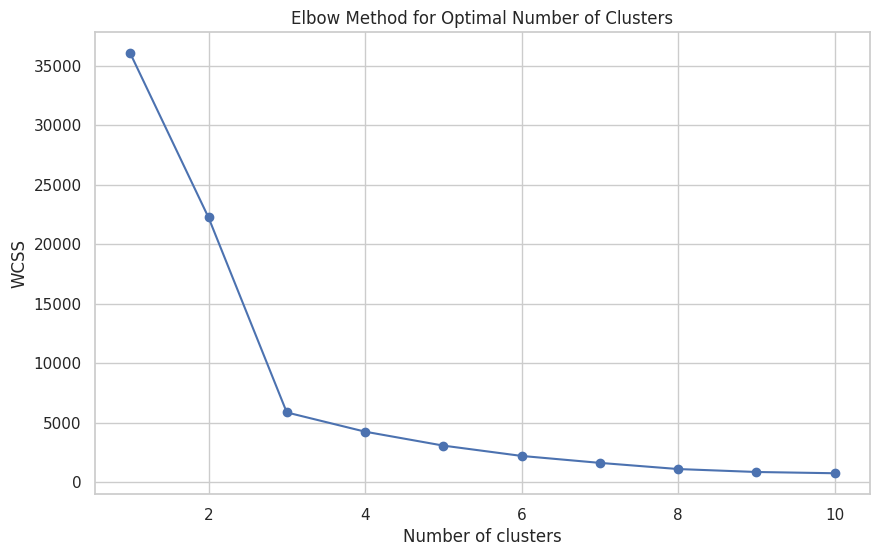

In [119]:
# Import the KMeans class
from sklearn.cluster import KMeans

# Calculate WCSS for different cluster numbers
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42) # Initialize KMeans with i clusters
    kmeans.fit(scaled_data) # Fit the model to your scaled data
    wcss.append(kmeans.inertia_) # Append the inertia_ (WCSS) to the list

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [120]:
# Determine the optimal number of clusters (e.g., from the Elbow method)
optimal_n_clusters = 3

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Get cluster assignments and add them to the DataFrame
data['Cluster'] = kmeans.labels_

# Now we can calculate the Silhouette Score
silhouette_avg = silhouette_score(scaled_data, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.9070569174892819


In [121]:
# From the plot, choose the optimal number of clusters
optimal_clusters = 3

In [122]:
# Apply K-Means clustering
#kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
#data['Cluster'] = kmeans.fit_predict(scaled_data)

In [123]:
# Get cluster labels for each data point - Print the members
cluster_labels = kmeans.labels_

In [124]:
# Create a pandas DataFrame to store the data points and their respective cluster labels
df_k = pd.DataFrame(scaled_data)
df_k['Cluster'] = cluster_labels

In [126]:
# To count the number of members in each cluster
cluster_counts = df_k['Cluster'].value_counts().sort_index()

# Print the number of members in each cluster
for cluster_num, count in cluster_counts.items():
    print(f'Cluster {cluster_num}: {count} members')

Cluster 0: 6812 members
Cluster 1: 395 members
Cluster 2: 3 members


In [127]:
# Define the threshold for high-value customers
# Assuming that the threshold for each spend category is set as the 75th percentile of the data
network_threshold = data['EST_NETWORK_SPEND_2023'].quantile(0.75) # Use 'data' instead of 'df'
security_threshold = data['EST_SECURITY_SPEND_2023'].quantile(0.75) # Use 'data' instead of 'df'
voice_threshold = data['EST_VOICE_SPEND_2023'].quantile(0.75) # Use 'data' instead of 'df'
services_threshold = data['EST_SERVICES_SPEND_2023'].quantile(0.75) # Use 'data' instead of 'df'
tot_spend_threshold = data['EST_TOT_SPEND_2023'].quantile(0.75) # Use 'data' instead of 'df'

In [128]:
# Define the threshold for medium-value customers
# Assuming that the threshold for each spend category is set as the 75th percentile of the data
network_threshold_med = data['EST_NETWORK_SPEND_2023'].quantile(0.50) # Use 'data' instead of 'df'
security_threshold_med = data['EST_SECURITY_SPEND_2023'].quantile(0.50) # Use 'data' instead of 'df'
voice_threshold_med = data['EST_VOICE_SPEND_2023'].quantile(0.50) # Use 'data' instead of 'df'
services_threshold_med = data['EST_SERVICES_SPEND_2023'].quantile(0.50) # Use 'data' instead of 'df'
tot_spend_threshold_med = data['EST_TOT_SPEND_2023'].quantile(0.50) # Use 'data' instead of 'df'

In [129]:
def classify_customer(row):
    # Check for High-Value customers
    if (row['EST_NETWORK_SPEND_2023'] >= network_threshold or
        row['EST_SECURITY_SPEND_2023'] >= security_threshold or
        row['EST_VOICE_SPEND_2023'] >= voice_threshold or
        row['EST_SERVICES_SPEND_2023'] >= services_threshold or
        row['EST_TOT_SPEND_2023'] >= tot_spend_threshold):
        return 'High-Value'

    # Check for Medium-Value customers
    elif (row['EST_NETWORK_SPEND_2023'] >= network_threshold_med or
          row['EST_SECURITY_SPEND_2023'] >= security_threshold_med or
          row['EST_VOICE_SPEND_2023'] >= voice_threshold_med or
          row['EST_SERVICES_SPEND_2023'] == services_threshold_med or
          row['EST_TOT_SPEND_2023'] == tot_spend_threshold_med):
        return 'Medium-Value'

    # Return Low-Value if none of the above conditions are met
    else:
        return 'Low-Value'

In [130]:
# Apply the classification
data['Customer_Segment'] = data.apply(classify_customer, axis=1)

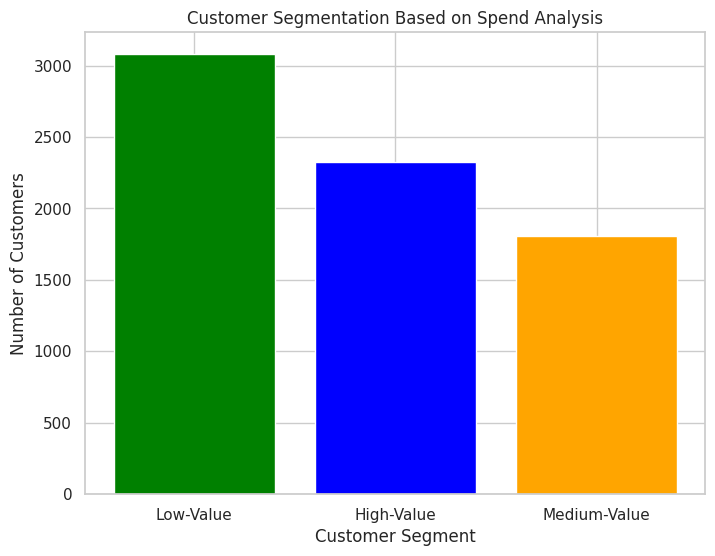

In [131]:
# Plot the distribution of customer segments
segment_counts = data['Customer_Segment'].value_counts() # Use 'data' instead of 'df'
plt.figure(figsize=(8,6))
plt.bar(segment_counts.index, segment_counts.values, color=['green', 'blue','orange'])
plt.title('Customer Segmentation Based on Spend Analysis')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()


In [132]:
# Display the first few rows of the dataframe with the new segmentation
data.head()

,BUS_NAME,STREET_ADDR,STREET_ADDR_2,CITY,STATE_CD,COUNTRY_NAME,EMPLOYEES_HERE,EMPLOYEES_TOTAL,NO_OF_FMLY_MMBRS,YEAR_ESTABLISHED,...,EST_SERVICES_SPEND_2022,EST_SERVICES_SPEND_2021,EST_VOICE_SPEND_2023,EST_VOICE_SPEND_2022,EST_VOICE_SPEND_2021,EST_TOT_SPEND_2023,EST_TOT_SPEND_2022,EST_TOT_SPEND_2021,Cluster,Customer_Segment
0,"Travel Guide, LLC",851 Trafalgar CT,NaN,Maitland,FL,USA,63,63,109,2015,...,10741.9464,9586.8984,43149.71,40129.2303,35814.2593,199607.0,185634.1566,165673.4946,0,High-Value
1,Firstbank,2323 E Arapahoe Rd,NaN,Centennial,CO,USA,1,0,175,0,...,34323.0357,30632.3867,40005.68,37205.2824,33204.7144,347624.0,323290.3200,288527.9200,0,High-Value
2,Big 5 Corp.,1610 Main St,NaN,Longmont,CO,USA,20,0,435,0,...,35012.4540,31247.6740,21618.13,20104.8609,17943.0479,500364.0,465338.4270,415302.0370,0,High-Value
3,The Preserve At Bal Harbor Condo Assoc Inc,2001 Bal Harbor Blvd,NaN,Punta Gorda,FL,USA,4,4,0,2017,...,98.5800,87.9800,188.03,174.8679,156.0649,10905.0,10141.7058,9051.1998,0,Medium-Value
4,Diamond Shamrock Refining and Marketing Company,34 Centennial Blvd,NaN,Highlands Ranch,CO,USA,7,0,2128,0,...,304428.5715,271694.3165,57523.03,53496.4179,47744.1149,892521.0,830044.6788,740792.5628,0,High-Value


In [133]:
# Save the dataframe to a CSV file
data.to_csv('/content/segmented_customers.csv', index=False) # Changed 'df' to 'data'

# Provide a link to download the CSV file
from google.colab import files
files.download('/content/segmented_customers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1200x800 with 0 Axes>

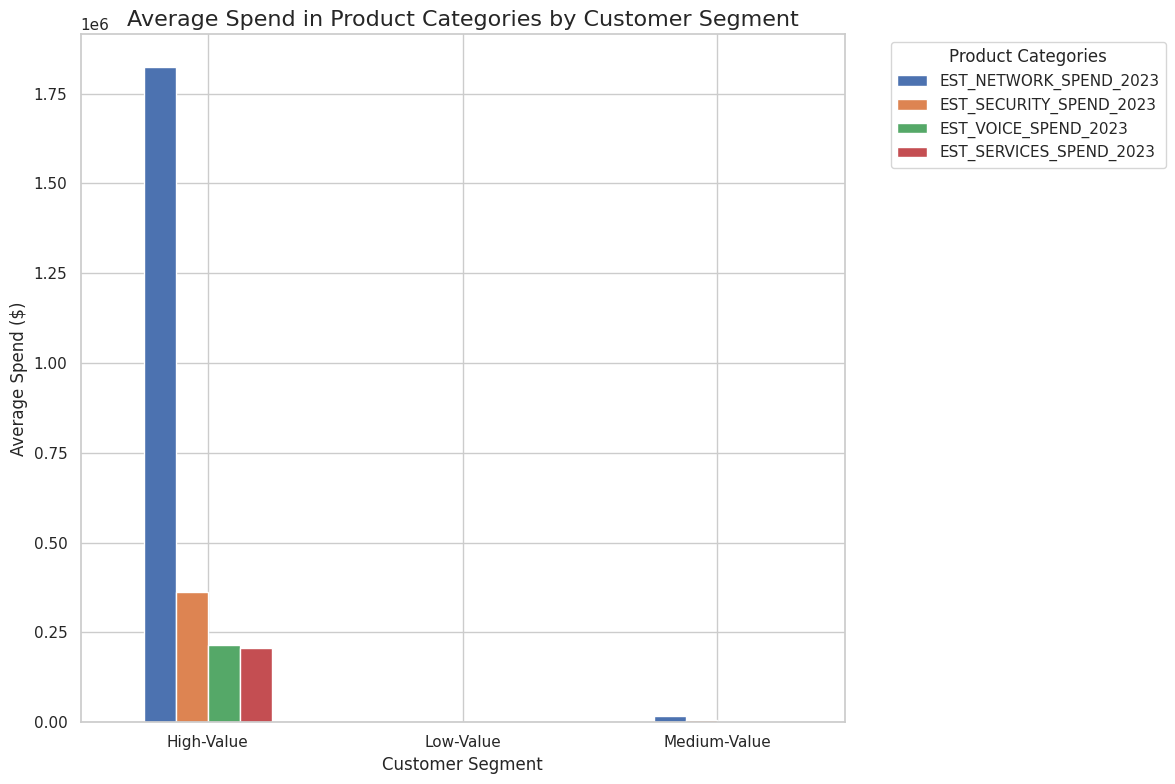

In [134]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn theme for better visuals
sns.set(style='whitegrid')

# Group data by Customer_Segment and calculate mean spend for each product category
# Convert selected columns to numeric type before calculating the mean
grouped_data = data.groupby('Customer_Segment').agg({
    'EST_NETWORK_SPEND_2023': 'mean',
    'EST_SECURITY_SPEND_2023': 'mean',
    'EST_VOICE_SPEND_2023': 'mean',
    'EST_SERVICES_SPEND_2023': 'mean'
})


# Plot the data using a bar plot
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', figsize=(12, 8))

# Set plot labels and title
plt.title('Average Spend in Product Categories by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Average Spend ($)', fontsize=12)
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [135]:
import pandas as pd

# Group data by Customer_Segment and calculate the mean for each product category
# Convert selected columns to numeric type before calculating the mean
grouped_data = data.groupby('Customer_Segment').agg({
    'EST_NETWORK_SPEND_2023': 'mean',
    'EST_SECURITY_SPEND_2023': 'mean',
    'EST_VOICE_SPEND_2023': 'mean',
    'EST_SERVICES_SPEND_2023': 'mean'
})

# Display the data in tabular format
print(grouped_data)

                  EST_NETWORK_SPEND_2023  EST_SECURITY_SPEND_2023  \
Customer_Segment                                                    
High-Value                  1.823919e+06            361326.087474   
Low-Value                   5.671083e+02               903.608347   
Medium-Value                1.812563e+04              7545.828080   

                  EST_VOICE_SPEND_2023  EST_SERVICES_SPEND_2023  
Customer_Segment                                                 
High-Value               214541.819918            207524.407487  
Low-Value                   175.823995               134.817113  
Medium-Value               2656.187084              4234.444250  


Overall summary is:

For Network:
High-Value customers are estimated to spend 1.82 million dollars.
Medium-Value customers are estimated to spend 18,125 dollars.
Low-Value customers are estimated to spend just over 567 dollars.

For SECURITY:

High-Value customers are estimated to spend 361,326 dollars.
Medium-Value customers are estimated to spend around 7,546 dollars.
Low-Value customers are estimated to spend 904 dollars.

For Voice:

High-Value customers are estimated to spend 214,542 dollars.
Medium-Value customers are estimated to spend 2,656 dollars.
Low-Value customers are estimated to spend around 176 dollars.

For Service:

High-Value customers are estimated to spend 207,524 dollars.
Medium-Value customers are estimated to spend 4,234 dollars.
Low-Value customers are estimated to spend around 135 dollars.

Interpretation:
High-Value customers are spending significantly more across all categories (Network, Security, Voice, Services) than Medium- and Low-Value customers.

Medium-Value customers are in the middle but are still far below the spending levels of High-Value customers.

Low-Value customers have much smaller spending, indicating their lower demand or usage of these services.

In [136]:
# Save the grouped data to a CSV file
grouped_data.to_csv('customer_segments_spend.csv', index=True)

# For Jupyter notebooks or Google Colab, you can enable download using this:
from google.colab import files
files.download('customer_segments_spend.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Business problem: How to prioritize and target customers based on value?

In [137]:
# Now build classification model
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [138]:
# Input Features
X = data[['EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023', 'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023']]

# Target Variable (Customer Segment)
y = data['Customer_Segment']

In [139]:
# Encode the target variable into numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # This will convert 'High-Value', 'Medium-Value', 'Low-Value' into numerical values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

Decision Tree Classifier:
Accuracy: 0.9958391123439667
              precision    recall  f1-score   support

  High-Value       0.99      0.99      0.99       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       0.99      0.99      0.99       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



In [142]:
# Initialize the Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

Logistic Regression Classifier:
Accuracy: 0.9750346740638003
              precision    recall  f1-score   support

  High-Value       0.98      0.99      0.98       672
   Low-Value       0.98      0.98      0.98       903
Medium-Value       0.96      0.94      0.95       588

    accuracy                           0.98      2163
   macro avg       0.97      0.97      0.97      2163
weighted avg       0.97      0.98      0.97      2163



In [143]:
# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Random Forest Classifier:
Accuracy: 0.9981507165973186
              precision    recall  f1-score   support

  High-Value       1.00      1.00      1.00       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       1.00      0.99      1.00       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



In [144]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [145]:
# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = gbm.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm, target_names=label_encoder.classes_))

Gradient Boosting Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

  High-Value       1.00      1.00      1.00       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       1.00      1.00      1.00       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



In [146]:
# Input Features - For SVM & KNN
X = data[['EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023', 'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023']]

# Target Variable (Customer Segment)
y = data['Customer_Segment']

# Encode the target variable into numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features for SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
# Initialize the Support Vector Classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Support Vector Machine Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))


Support Vector Machine Classifier:
Accuracy: 0.7572815533980582
              precision    recall  f1-score   support

  High-Value       0.99      0.97      0.98       672
   Low-Value       0.64      1.00      0.78       903
Medium-Value       0.82      0.14      0.24       588

    accuracy                           0.76      2163
   macro avg       0.82      0.70      0.67      2163
weighted avg       0.80      0.76      0.70      2163



In [148]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print("K-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

K-Nearest Neighbors Classifier:
Accuracy: 0.9884419787332409
              precision    recall  f1-score   support

  High-Value       0.99      0.99      0.99       672
   Low-Value       0.99      1.00      0.99       903
Medium-Value       0.99      0.97      0.98       588

    accuracy                           0.99      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.99      0.99      0.99      2163



In [149]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Classification Report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Decision Tree Accuracy: 0.9958
Decision Tree Classification Report:
              precision    recall  f1-score   support

  High-Value       0.99      0.99      0.99       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       0.99      0.99      0.99       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



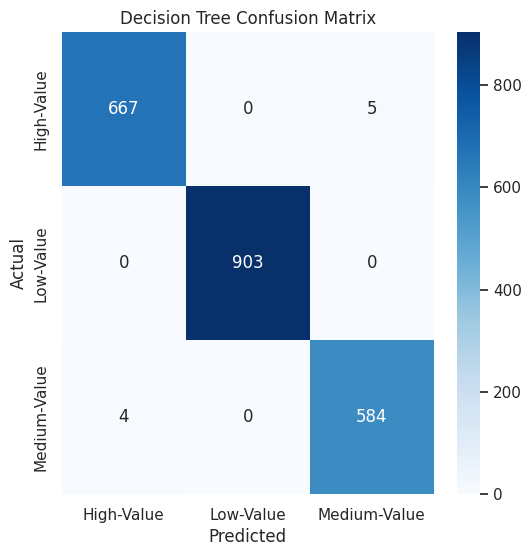

Random Forest Accuracy: 0.9982
Random Forest Classification Report:
              precision    recall  f1-score   support

  High-Value       1.00      1.00      1.00       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       1.00      0.99      1.00       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



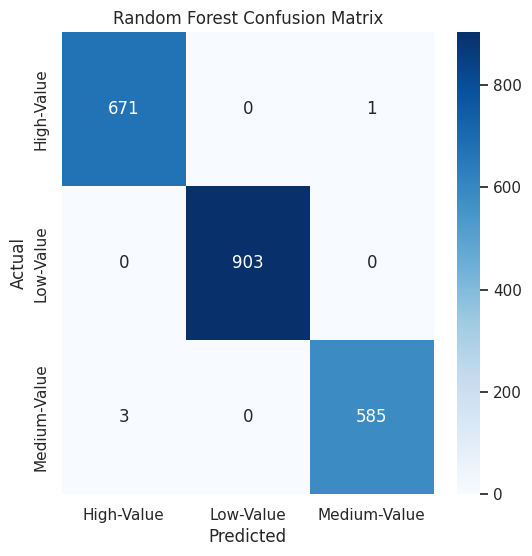

Logistic Regression Accuracy: 0.9750
Logistic Regression Classification Report:
              precision    recall  f1-score   support

  High-Value       0.98      0.99      0.98       672
   Low-Value       0.98      0.98      0.98       903
Medium-Value       0.96      0.94      0.95       588

    accuracy                           0.98      2163
   macro avg       0.97      0.97      0.97      2163
weighted avg       0.97      0.98      0.97      2163



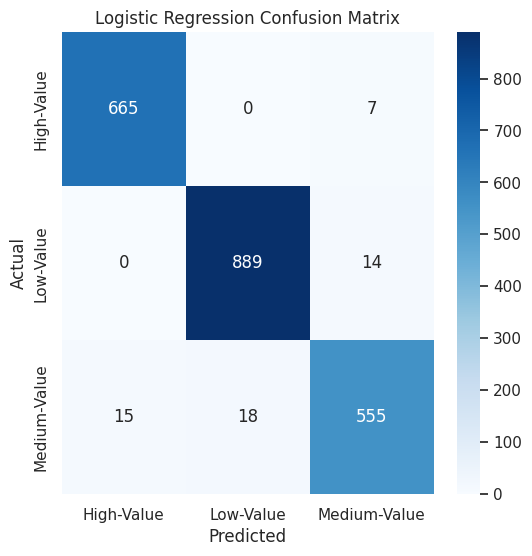

Gradient Boosting Accuracy: 1.0000
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

  High-Value       1.00      1.00      1.00       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       1.00      1.00      1.00       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



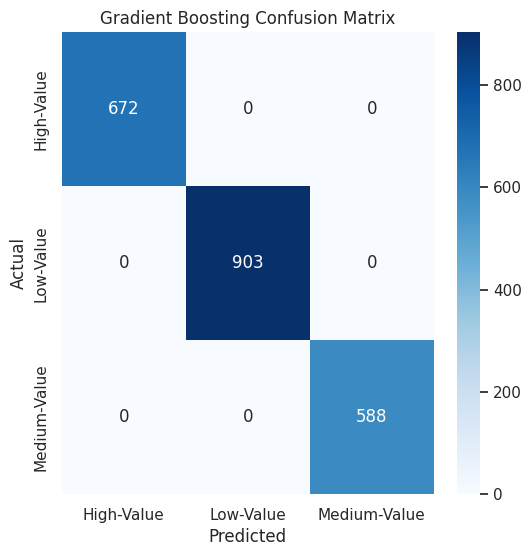

Support Vector Machine Accuracy: 0.7573
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

  High-Value       0.99      0.97      0.98       672
   Low-Value       0.64      1.00      0.78       903
Medium-Value       0.82      0.14      0.24       588

    accuracy                           0.76      2163
   macro avg       0.82      0.70      0.67      2163
weighted avg       0.80      0.76      0.70      2163



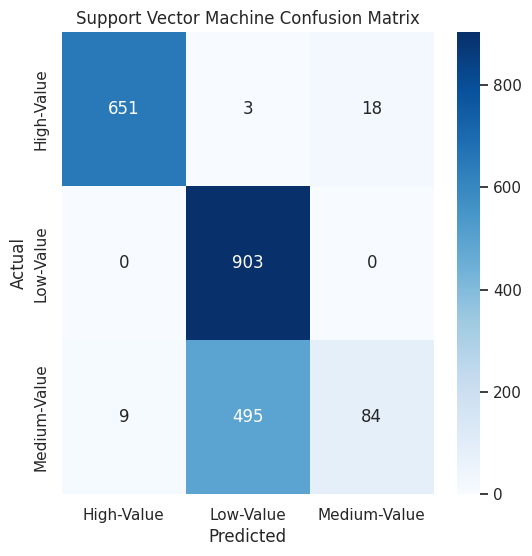

K-Nearest Neighbors Accuracy: 0.9884
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

  High-Value       0.99      0.99      0.99       672
   Low-Value       0.99      1.00      0.99       903
Medium-Value       0.99      0.97      0.98       588

    accuracy                           0.99      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.99      0.99      0.99      2163



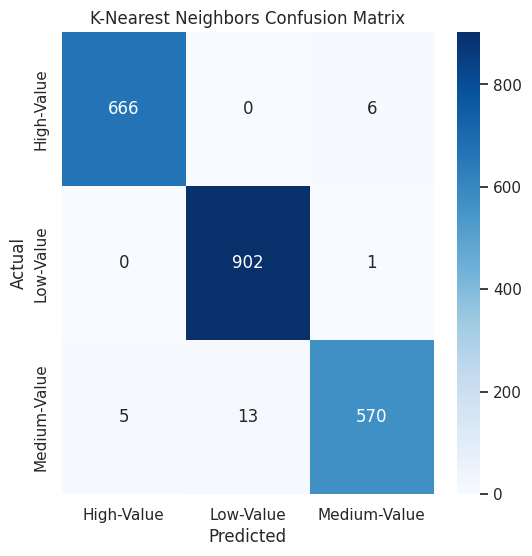

In [150]:
# Decision Tree Evaluation
evaluate_model(decision_tree, X_test, y_test, "Decision Tree")

# Random Forest Evaluation
evaluate_model(random_forest, X_test, y_test, "Random Forest")

# Logistic Regression Evaluation
evaluate_model(logistic_reg, X_test, y_test, "Logistic Regression")

# Gradient Boosting Evaluation
evaluate_model(gbm, X_test, y_test, "Gradient Boosting")

# Support Vector Machine Evaluation (scaled data)
evaluate_model(svm_model, X_test_scaled, y_test, "Support Vector Machine")

# K-Nearest Neighbors Evaluation (scaled data)
evaluate_model(knn, X_test_scaled, y_test, "K-Nearest Neighbors")

Quick Performance Summary of the Models:

Decision Tree ->

High-Value: 667 correctly predicted, 5 misclassified as Medium-Value.
Low-Value: 903 perfectly predicted (no errors).
Medium-Value: 584 correctly predicted, 4 misclassified as High-Value.

Random Forest->

High-Value: 671 correctly predicted, 1 misclassified as Medium-Value.
Low-Value: 903 perfectly predicted (no errors).
Medium-Value: 585 correctly predicted, 3 misclassified as High-Value.
Logistic Regression:

High-Value: 665 correctly predicted, 7 misclassified as Medium-Value.
Low-Value: 889 correctly predicted, 14 misclassified as Medium-Value.
Medium-Value: 555 correctly predicted, 33 misclassified (15 as High-Value, 18 as Low-Value).

Support Vector Machine (SVM) ->

High-Value: 651 correctly predicted, 21 misclassified (3 as Low-Value, 18 as Medium-Value).
Low-Value: 903 perfectly predicted (no errors).
Medium-Value: 84 correctly predicted, 504 misclassified (495 as Low-Value, 9 as High-Value).

Gradient Boosting ->

High-Value: 672 correctly predicted, 0 misclassified.
Low-Value: 903 perfectly predicted (no errors).
Medium-Value: 588 correctly predicted, 0 misclassified.

Gradient Boosting is clearly performing the best.

In [151]:
# Define the evaluate_model function
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates a machine learning model and prints the results.

    Args:
      model: The trained machine learning model.
      X_test: The features for testing.
      y_test: The target variable for testing.
      model_name: The name of the model.
    """

    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classifier:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Make sure to import the necessary libraries
!pip install scikit-learn
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Now you can call the evaluate_model function
# Decision Tree Evaluation
evaluate_model(decision_tree, X_test, y_test, "Decision Tree")

# Random Forest Evaluation
evaluate_model(random_forest, X_test, y_test, "Random Forest")

# Logistic Regression Evaluation
evaluate_model(logistic_reg, X_test, y_test, "Logistic Regression")

# Gradient Boosting Evaluation
evaluate_model(gbm, X_test, y_test, "Gradient Boosting")

# Support Vector Machine Evaluation (scaled data)
evaluate_model(svm_model, X_test_scaled, y_test, "Support Vector Machine")

# K-Nearest Neighbors Evaluation (scaled data)
evaluate_model(knn, X_test_scaled, y_test, "K-Nearest Neighbors")


Decision Tree Classifier:
Accuracy: 0.9958391123439667
              precision    recall  f1-score   support

  High-Value       0.99      0.99      0.99       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       0.99      0.99      0.99       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163


Random Forest Classifier:
Accuracy: 0.9981507165973186
              precision    recall  f1-score   support

  High-Value       1.00      1.00      1.00       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       1.00      0.99      1.00       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163


Logistic Regression Classifier:
Accuracy: 0.9750346740638003
              precision    recall  f1-score   support

  High-Va